In [26]:
#importing all the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [27]:
#loading the data using pandas

data = pd.read_csv("/content/drive/MyDrive/Machine Learning/Regression/Multiple Linear Regression/50_Startups.csv")

In [29]:
#viewing the data loaded

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
#Checking for null values and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [31]:
#seeing the unique values in the State column

data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [32]:
#encoding the state column, because we cann't pass an object column to the model

encoder = LabelEncoder()
data['State'] = encoder.fit_transform(data['State'])

In [33]:
#seperating the features and label

X = data.drop('Profit',axis=1)
y = data['Profit']

In [34]:
#splitting the data into training set and testing test

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state=42)

In [36]:
#Training the model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
#Predicting for X_test

y_pred = model.predict(X_test)

In [38]:
#comparing y_test and y_pred

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [23]:
print("Accuracy :",r2)
print("Mean Squared Error :",mse)
print("Mean Absolute Error :",mae)

Accuracy : 0.9000614254946404
Mean Squared Error : 80929465.49097767
Mean Absolute Error : 6979.17574672138


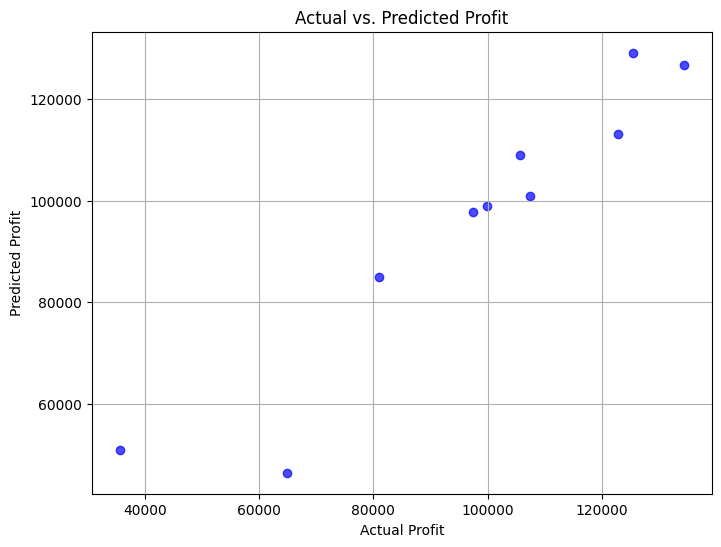

In [24]:
# Visualize the actual vs. predicted profit using a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs. Predicted Profit')
plt.grid(True)
plt.show()